<a href="https://colab.research.google.com/github/utrionedv/matstat_kursa4/blob/main/%D0%BF%D1%803_%D0%B1%D1%83%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import r2_score


In [ ]:
def pr(df):
  m = round(1 + 3.332 * (np.log10(len(df))))

  print('Число интервалов m: ', m)
  xmax = df.iloc[:, 0].max()
  xmin = df.iloc[:, 0].min()
  h = (xmax-xmin)/m
  intervals = pd.DataFrame(columns=['Start','End'])
  i = 0
  xstart = xmin - 0.01
  while i <= m:
    intervals.loc[len(intervals)] = [xstart, xstart + h]
    xstart = xstart + h
    i += 1
  print('Cтатистический интервальный ряд: ')
  print(intervals)
  realCount = pd.DataFrame(columns=['n'])
  new_index = []

  for ind, row in intervals.iterrows():
    realCount.loc[len(realCount)] = ((df >= row['Start']) & (df < row['End'])).sum().iloc[0]
    new_index.append(str(round(row['Start'],3)) + ' - ' + str((round(row['End'],3))))

  realCount['w'] = realCount['n'] / realCount['n'].sum()
  realCount = pd.concat([intervals, realCount], axis=1)
  realCount.index = new_index

  fig, ax1 = plt.subplots()
  ax1.bar(realCount.index, realCount['w'], width=0.8, alpha=0.6, label='Относительные частоты')
  ax1.set_xlabel('Интервалы')
  ax1.set_ylabel('Относительные частоты')
  ax1.tick_params(axis='y')
  ax1.tick_params(axis='x', labelsize=5)
  ax2 = ax1.twinx()
  ax2.bar(realCount.index, realCount['n'], width=0.8, alpha=0.6, label='Абсолютные частоты')
  ax2.set_ylabel('Абсолютные частоты')
  ax2.tick_params(axis='y')
  plt.title('Гистограмма распределения частот')
  plt.show()
  mean1 = df.iloc[:, 0].mean()
  std1 = df.iloc[:, 0].std()
  print(mean1, '\n', std1)

  realCount['Pi1'] = scipy.stats.norm.cdf((realCount['End'] - mean1)/std1) - scipy.stats.norm.cdf((realCount['Start'] - mean1)/std1)
  realCount['ni1'] = realCount['Pi1'] * len(df)

  X2_1 = (((realCount['n'] - realCount['ni1']) ** 2) / realCount['ni1']).sum()
  X2max = scipy.stats.chi2.ppf(0.95, m - 2)
  print('X^2: ',X2_1,' X2max: ',X2max)
  if X2_1 > X2max:
    print('Нулевая гипотеза о нормальности распределения отвергается. Выборка не распределена по нормальному закону.')
  else:
    print('Нулевая гипотеза о нормальности распределения принимается. Выборка распределена по нормальному закону.')


  realCount['Pi2'] = np.exp((-1 * realCount['End'])/mean1) - np.exp((-1 * realCount['Start'])/mean1)
  realCount['ni2'] = realCount['Pi2'] * len(df)

  X2_2 = (((realCount['n'] - realCount['ni2']) ** 2) / realCount['ni2']).sum()
  print('X^2: ',X2_2,' X2max: ',X2max)
  if X2_2 > X2max:
    print('Нулевая гипотеза о показательности распределения отвергается. Выборка не распределена по показательном закону.')
  else:
    print('Нулевая гипотеза о показательности распределения принимается. Выборка распределена по показательном закону.')

  x = (((realCount['End'] + realCount['Start'])/2) - mean1) ** 2
  y = np.log(realCount['w'])
  plt.scatter(x, y, s=10)
  k, b = np.polyfit(x, y, deg=1)
  r_squared = r2_score(y, k*x+b)
  plt.plot(x, k*x+b,  color='red')
  plt.title('Анаморфоза для нормального распределения')
  plt.xlabel('(x - xmean)^2 \n R^2: '+str(r_squared))
  plt.ylabel('ln(w)')

  plt.show()

  x = ((realCount['End'] + realCount['Start'])/2)
  y = np.log(realCount['w'])
  plt.scatter(x, y, s=10)
  k, b = np.polyfit(x, y, deg=1)
  plt.plot(x, k*x+b,  color='red')
  r_squared = r2_score(y, k*x+b)
  plt.title('Анаморфоза для показательного распределения')
  plt.xlabel('x \n R^2: '+str(r_squared))
  plt.ylabel('ln(w)')

  plt.show()

## Ряд 1

Число интервалов m:  6
Cтатистический интервальный ряд: 
       Start        End
0  -5.495023  -1.253782
1  -1.253782   2.987458
2   2.987458   7.228699
3   7.228699  11.469939
4  11.469939  15.711179
5  15.711179  19.952420
6  19.952420  24.193660


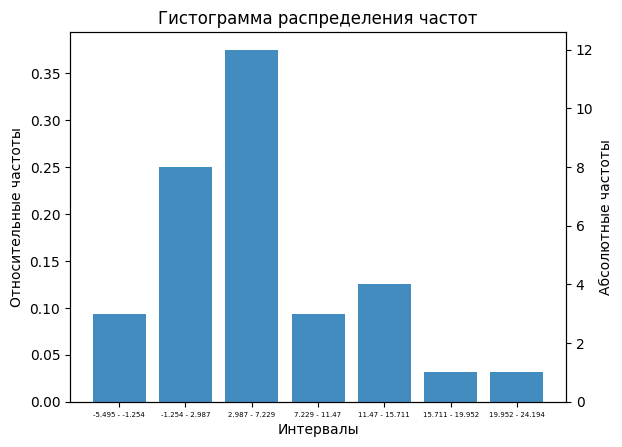

5.7117479421870225 
 5.700104453954399
X^2:  7.718417822703996  X2max:  9.487729036781154
Нулевая гипотеза о нормальности распределения принимается. Выборка распределена по нормальному закону.
X^2:  -176.94226589786695  X2max:  9.487729036781154
Нулевая гипотеза о показательности распределения принимается. Выборка распределена по показательном закону.


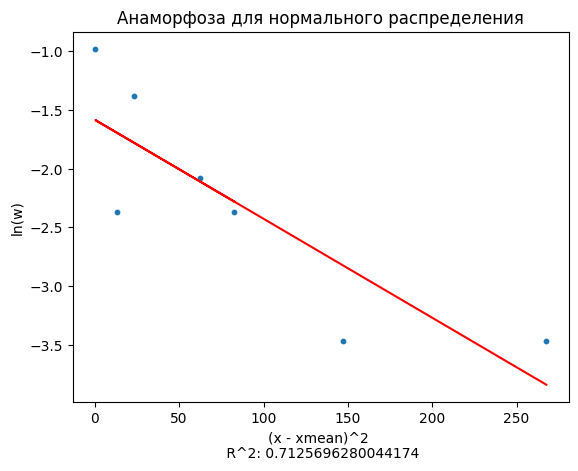

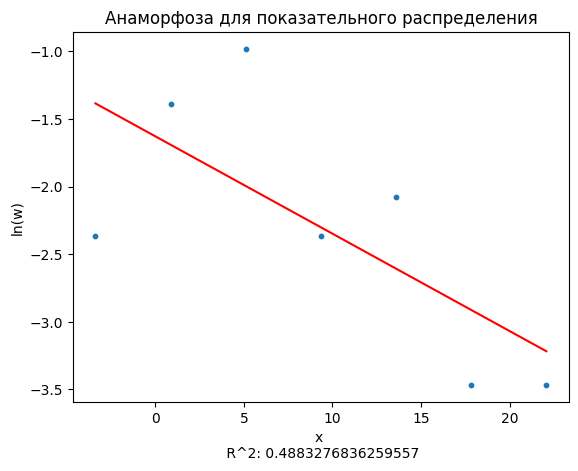

In [ ]:
df1 = pd.DataFrame()
df1['1'] = pd.read_csv("/content/1.txt", header=None)
pr(df1)

## Ряд 3

32
Число интервалов m:  6
Cтатистический интервальный ряд: 
      Start        End
0  0.044378   1.483445
1  1.483445   2.922512
2  2.922512   4.361578
3  4.361578   5.800645
4  5.800645   7.239711
5  7.239711   8.678778
6  8.678778  10.117845


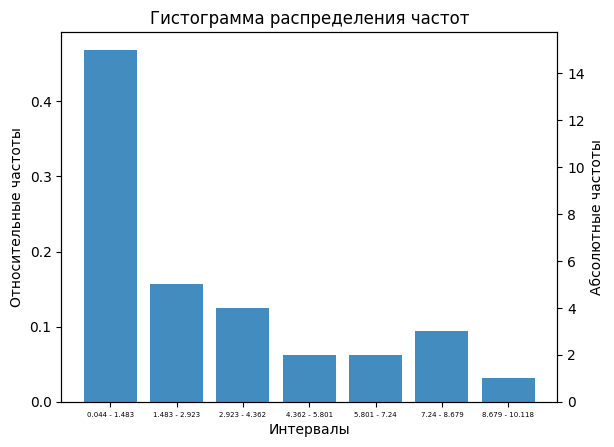

2.831298076331711 
 2.691574549381038
X^2:  26.746353467190684  X2max:  9.487729036781154
Нулевая гипотеза о нормальности распределения отвергается. Выборка не распределена по нормальному закону.
X^2:  -134.04544105341003  X2max:  9.487729036781154
Нулевая гипотеза о показательности распределения принимается. Выборка распределена по показательном закону.


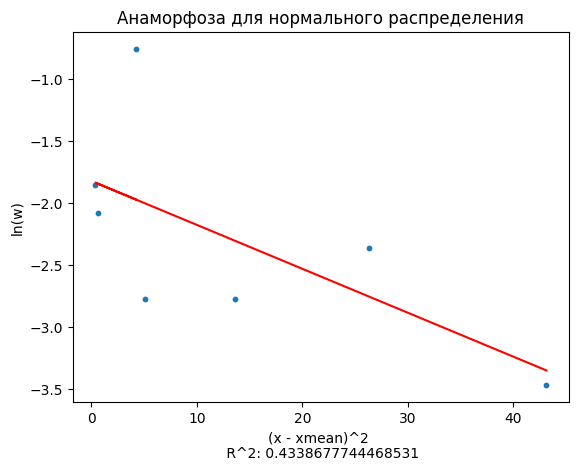

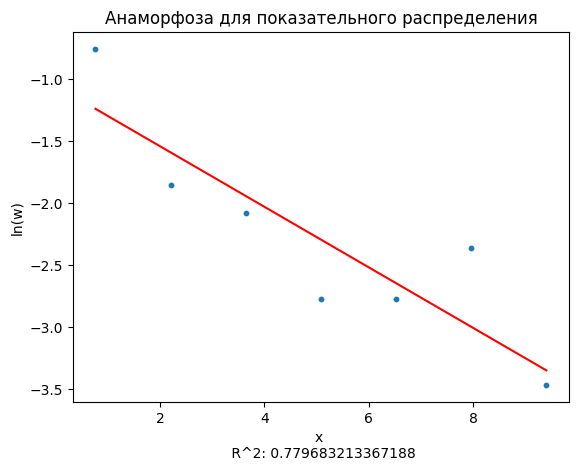

In [ ]:
  df3 = pd.DataFrame()
df3['3'] = pd.read_csv("/content/3.txt", header=None)
pr(df3)

## Ряд 4

Число интервалов m:  8
Cтатистический интервальный ряд: 
       Start        End
0 -21.738438 -17.578317
1 -17.578317 -13.418195
2 -13.418195  -9.258073
3  -9.258073  -5.097952
4  -5.097952  -0.937830
5  -0.937830   3.222292
6   3.222292   7.382413
7   7.382413  11.542535
8  11.542535  15.702657


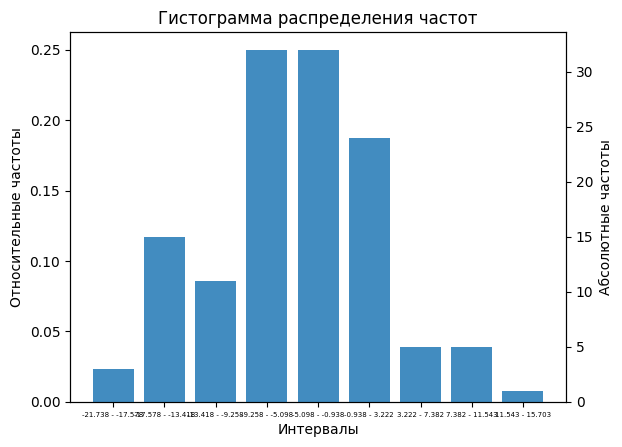

-4.850555064621148 
 6.800924600826641
X^2:  11.564990047468202  X2max:  12.591587243743977
Нулевая гипотеза о нормальности распределения принимается. Выборка распределена по нормальному закону.
X^2:  3126.9330201493826  X2max:  12.591587243743977
Нулевая гипотеза о показательности распределения отвергается. Выборка не распределена по показательном закону.
                       Start        End   n         w       Pi1        ni1  \
-21.738 - -17.578 -21.738438 -17.578317   3  0.023438  0.024129   3.088481   
-17.578 - -13.418 -17.578317 -13.418195  15  0.117188  0.073236   9.374145   
-13.418 - -9.258  -13.418195  -9.258073  11  0.085938  0.154593  19.787860   
-9.258 - -5.098    -9.258073  -5.097952  32  0.250000  0.227023  29.058960   
-5.098 - -0.938    -5.097952  -0.937830  32  0.250000  0.231972  29.692479   
-0.938 - 3.222     -0.937830   3.222292  24  0.187500  0.164927  21.110671   
3.222 - 7.382       3.222292   7.382413   5  0.039062  0.081578  10.441997   
7.382 - 11.543   

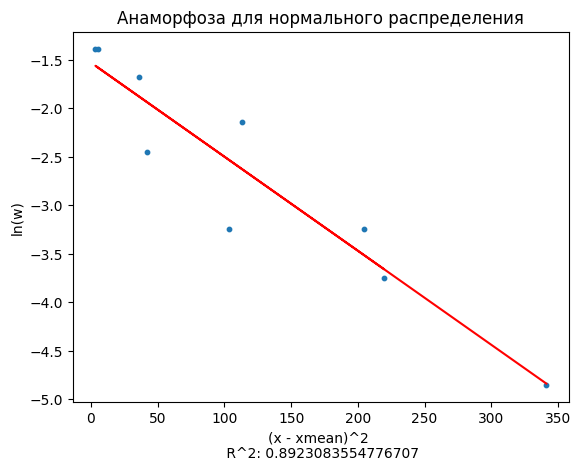

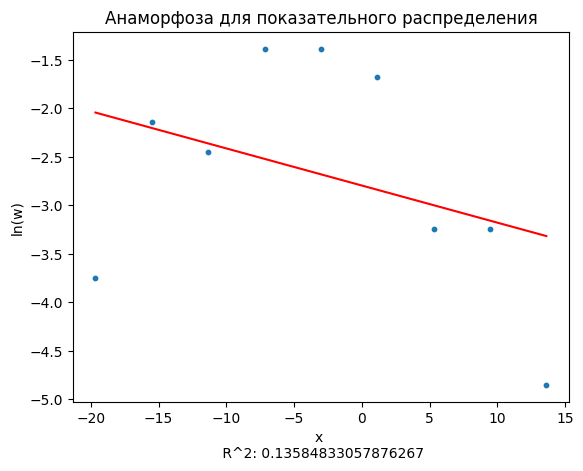

In [ ]:
df4 = pd.DataFrame()
df4['4'] = pd.read_csv("/content/4.txt", header=None)
pr(df4)

### Ряд 6

Число интервалов m:  8
Cтатистический интервальный ряд: 
       Start        End
0   0.138176   2.577339
1   2.577339   5.016501
2   5.016501   7.455664
3   7.455664   9.894826
4   9.894826  12.333989
5  12.333989  14.773151
6  14.773151  17.212314
7  17.212314  19.651476
8  19.651476  22.090639


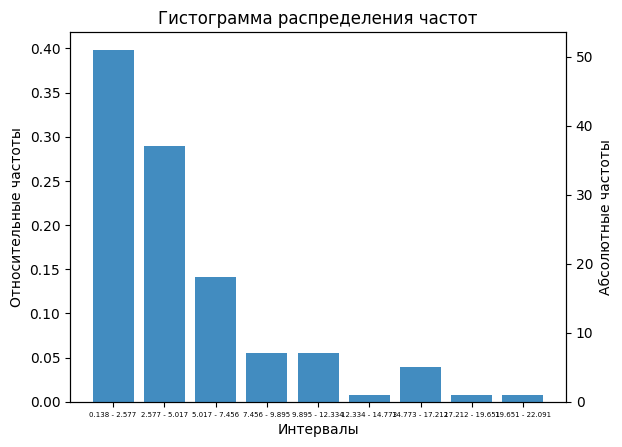

4.455836961470638 
 4.228231658740434
X^2:  129.2010200749756  X2max:  12.591587243743977
Нулевая гипотеза о нормальности распределения отвергается. Выборка не распределена по нормальному закону.
X^2:  -521.3327238666583  X2max:  12.591587243743977
Нулевая гипотеза о показательности распределения принимается. Выборка распределена по показательном закону.
                     Start        End   n         w       Pi1        ni1  \
0.138 - 2.577     0.138176   2.577339  51  0.398438  0.174830  22.378273   
2.577 - 5.017     2.577339   5.016501  37  0.289062  0.224323  28.713392   
5.017 - 7.456     5.016501   7.455664  18  0.140625  0.208240  26.654730   
7.456 - 9.895     7.455664   9.894826   7  0.054688  0.139854  17.901363   
9.895 - 12.334    9.894826  12.333989   7  0.054688  0.067945   8.696973   
12.334 - 14.773  12.333989  14.773151   1  0.007812  0.023874   3.055828   
14.773 - 17.212  14.773151  17.212314   5  0.039062  0.006065   0.776323   
17.212 - 19.651  17.212314  19.6514

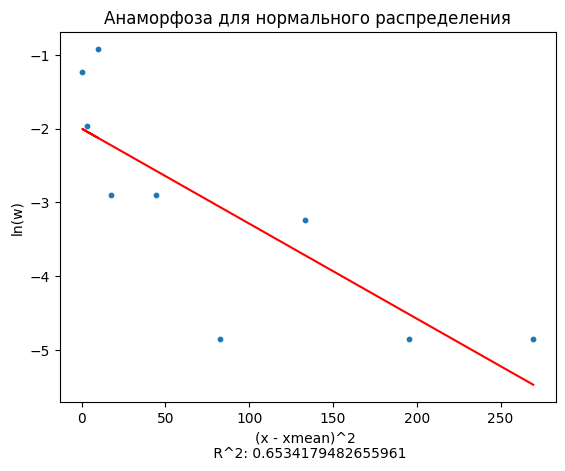

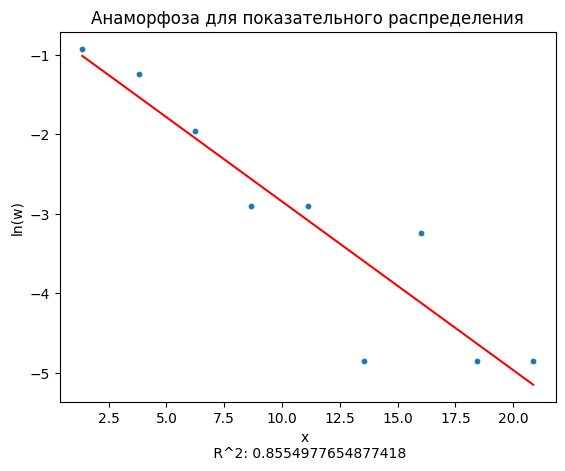

In [ ]:
df6 = pd.DataFrame()
df6['6'] = pd.read_csv("/content/6.txt", header=None)
pr(df6)